<a href="https://colab.research.google.com/github/abdallahgamal5500/IMDB-Movie-Review-Sentiment-Classification/blob/main/IMDB_movie_review_sentiment_classification_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, regularizers
from tensorflow.keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout,BatchNormalization

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
top_words = 20000;
input_length = 1000;

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=top_words)

In [ ]:
print(x_train.shape)

(25000,)


In [ ]:
print(y_train.shape)

(25000,)


In [ ]:
print(x_test.shape)

(25000,)


In [ ]:
print(y_test.shape)

(25000,)


In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=input_length)
x_test = sequence.pad_sequences(x_test, maxlen=input_length)

In [ ]:
x_train.shape

(25000, 1000)

In [ ]:
x_test.shape

(25000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 0)

In [ ]:
model = Sequential()
model.add(Embedding(top_words, 50, input_length=input_length, embeddings_regularizer=regularizers.L2(0.05)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(LSTM(32))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 50)          1000000   
                                                                 
 batch_normalization (BatchN  (None, 1000, 50)         200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1000, 50)          0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                10624     
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=16, validation_data=(x_val, y_val), validation_batch_size=16 , epochs=10)

Epoch 1/10
1250/1250 [==============================] - 414s 330ms/step - loss: 1.4960 - accuracy: 0.7230 - val_loss: 0.8138 - val_accuracy: 0.8284
Epoch 2/10
1250/1250 [==============================] - 415s 332ms/step - loss: 0.8152 - accuracy: 0.8234 - val_loss: 0.7116 - val_accuracy: 0.8520
Epoch 3/10
1250/1250 [==============================] - 421s 336ms/step - loss: 0.7882 - accuracy: 0.8360 - val_loss: 0.7320 - val_accuracy: 0.8544
Epoch 4/10
1250/1250 [==============================] - 418s 335ms/step - loss: 0.8155 - accuracy: 0.8452 - val_loss: 0.7551 - val_accuracy: 0.8686
Epoch 5/10
1250/1250 [==============================] - 441s 353ms/step - loss: 0.7889 - accuracy: 0.8510 - val_loss: 0.6772 - val_accuracy: 0.8712
Epoch 6/10
1250/1250 [==============================] - 438s 350ms/step - loss: 0.7848 - accuracy: 0.8540 - val_loss: 0.7286 - val_accuracy: 0.8780
Epoch 7/10
1250/1250 [==============================] - 457s 366ms/step - loss: 0.7769 - accuracy: 0.8573 - val_

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('\nTest accuracy:', (test_acc*100))


Test accuracy: 87.30400204658508


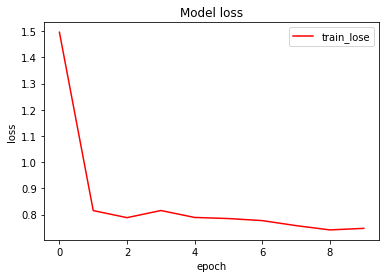

In [ ]:
plt.plot(history.history['loss'], color='r')
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_lose'], loc='upper right')
plt.show()

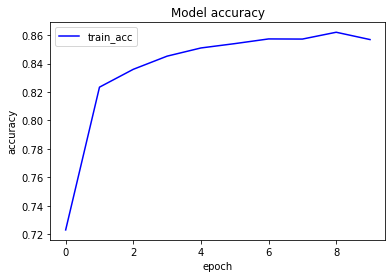

In [ ]:
plt.plot(history.history['accuracy'], color='b')
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11297  1203]
 [ 1971 10529]]


0.87304